In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\Jarvis\OneDrive\Desktop\project\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


replace blanks with 0 as tenure and on totla charges are recorded

In [5]:
df["TotalCharges"] =  df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [6]:
def conv(value):
    if value == 1:
        return("Yes")
    else:
        return("No")
    
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

converted 0 and 1 values of senior citizen with yes/no to make it easier to understand

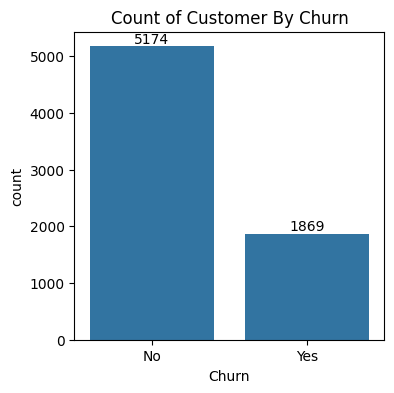

In [ ]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x= 'Churn', data=df)
ax = plt.bar_label(ax.containers[0])
plt.title("Count of Customer By Churn")
plt.show()

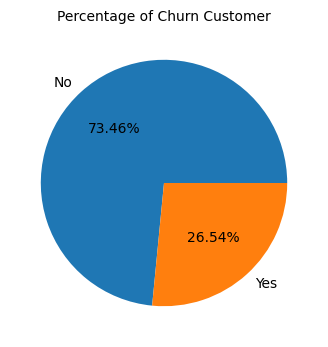

In [17]:
plt.figure(figsize=(4,4))
gb = df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb['Churn'], labels= gb.index, autopct= "%1.2f%%")
plt.title("Percentage of Churn Customer" , fontsize = 10)
plt.show()

From the given pie chart we can conclude 26.54%  of are customer's churned out
now lets explore the reason behind it

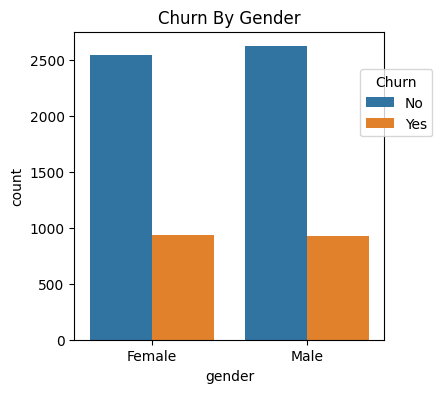

In [9]:
plt.figure(figsize = (4,4))
sns.countplot(x = "gender" ,data= df , hue = "Churn")
plt.title("Churn By Gender")(title='Churn', bbox_to_anchor = (0.9,0.9))
plt.legend
plt.show()

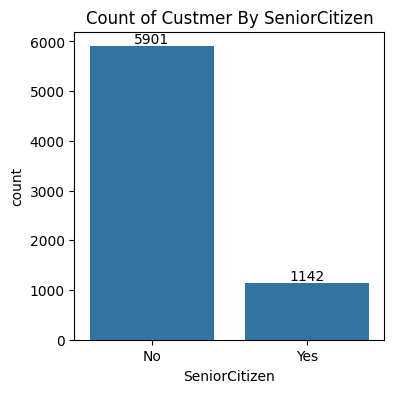

In [10]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Custmer By SeniorCitizen")
plt.show()

comparative a greater pecentage of people in senior citizen category have churned

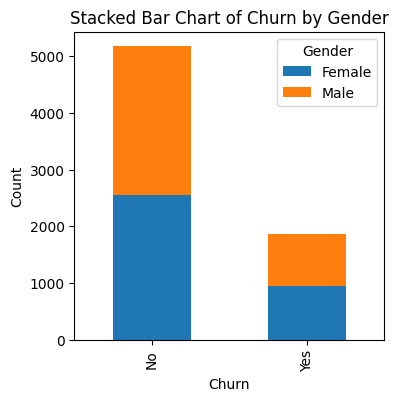

In [11]:
pivot_df = df.pivot_table(index='Churn', columns='gender', aggfunc='size', fill_value=0)
pivot_df.plot(kind='bar', stacked=True, figsize=(4, 4))
plt.title('Stacked Bar Chart of Churn by Gender')
plt.ylabel('Count')
plt.xlabel('Churn')
plt.legend(title='Gender')
plt.show()

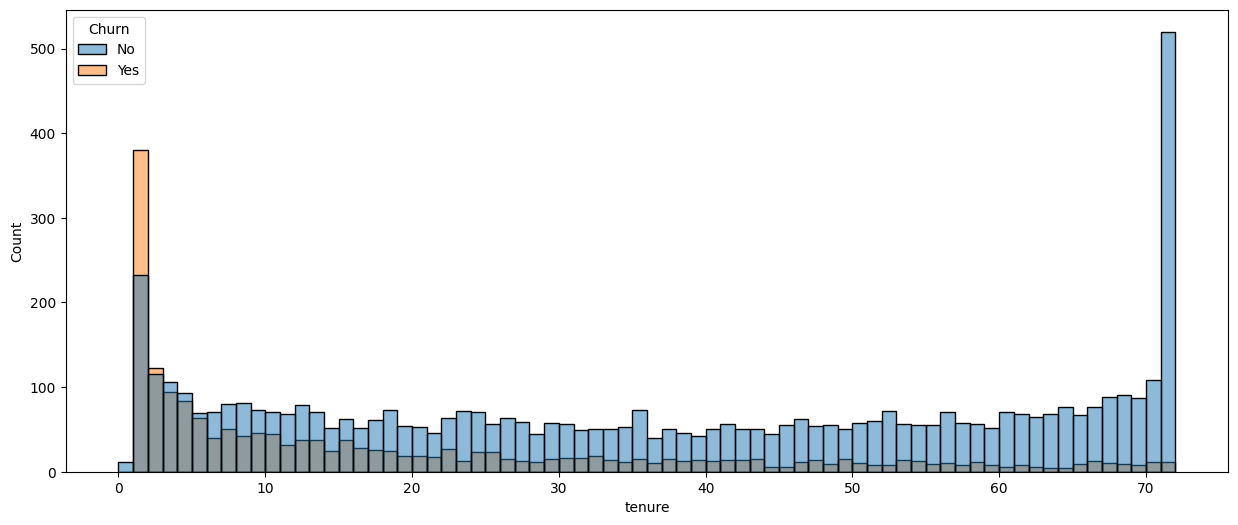

In [12]:
plt.figure(figsize = (15,6))
sns.histplot(x = "tenure" , data =df , bins = 72, hue = "Churn")
plt.show()

people who have used our services for a long time have stayed and people who have used our sevices

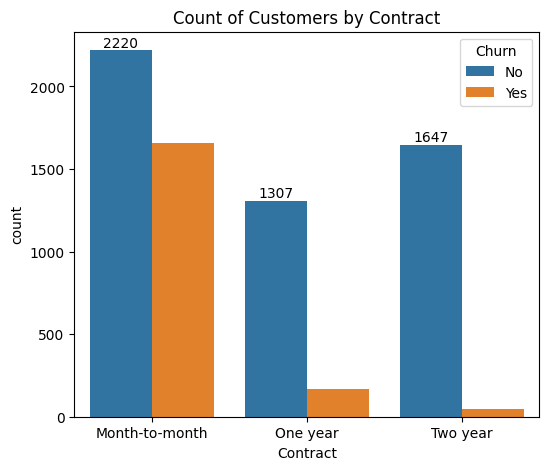

In [13]:
plt.figure(figsize = (6,5))
ax = sns.countplot(x = "Contract" ,data = df ,hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

people who have month to month contract are likely to churn then from those who have 1 or 2 years or contract.

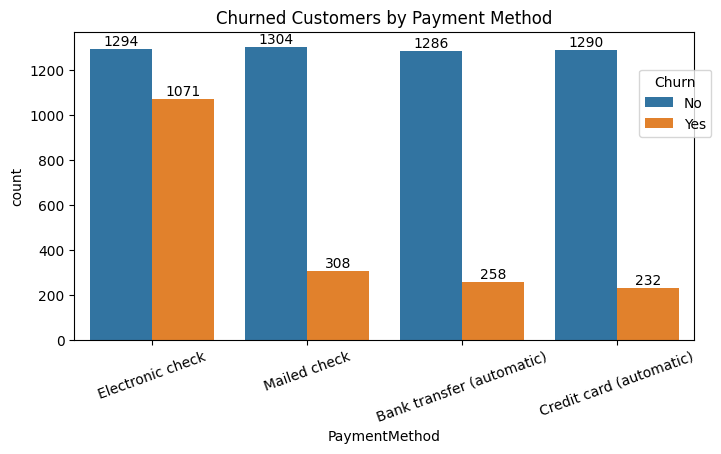

In [29]:
plt.figure(figsize = (8,4))
ax = sns.countplot(x = "PaymentMethod" ,  data = df ,  hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.legend(title='Churn', bbox_to_anchor = (0.9,0.9))
plt.xticks(rotation = 20)
plt.show()

customer is likely to churn when he is using electronic check as a payment method.